In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import math

In [331]:
# 1. output a 5X5 identity matrix
a = np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

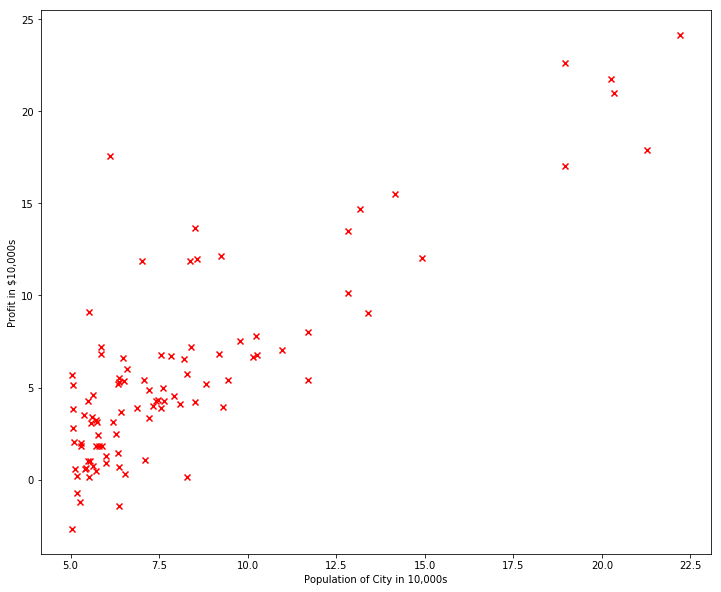

In [332]:
# 2.1 reading ex1data1
pop = []
prft = []
f = open('ex1data1.txt', 'r')
for line in f.readlines():
    pop.append(float(line.split(',')[0]))
    prft.append(float(line.split(',')[1]))
plt.figure(figsize=(12,10))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(pop, prft, marker='x', color='r')

In [333]:
# 2.2 gradient descent
pop = np.array(pop)
pop = np.expand_dims(pop, axis = 1)
pop = np.hstack((np.ones((pop.shape[0], 1)), pop))
prft = np.reshape(prft, (len(prft), 1))

In [334]:
def getcost(theta):
    a = np.dot(pop, theta) - prft
    a = np.power(a, 2)
    return np.sum(a) / (2 * pop.shape[0])
pop[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [335]:
theta = np.zeros((2, 1))
alpha = 0.01
for i in range(1500):
    cost = getcost(theta)
    a = np.dot(pop, theta) - prft
    for j in range(2):
        temp = np.sum(np.multiply(a, pop[:,j].reshape((pop.shape[0], 1)))) / pop.shape[0]
        theta[j] = theta[j] - alpha * temp
        
print(theta, cost)

[[-3.63029144]
 [ 1.16636235]] 4.483411453374869


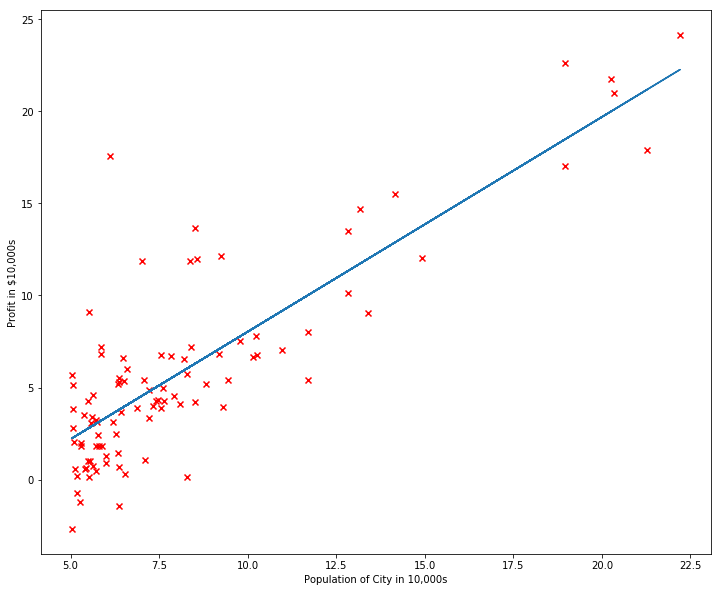

In [336]:
plt.figure(figsize=(12,10))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(pop[:,1], prft, marker='x', color='r')
predict1 = pop[:, 1] * theta[1] + theta[0]
plt.plot(pop[:, 1], predict1)

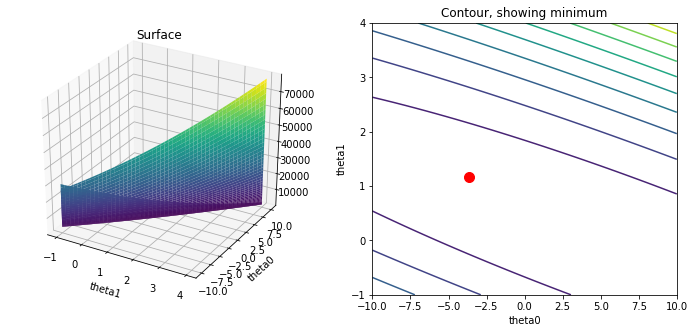

In [337]:
# refer to https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = getcost([theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta1_vals, theta0_vals, J_vals, cmap='viridis')
plt.xlabel('theta1')
plt.ylabel('theta0')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.title('Contour, showing minimum')
plt.contour(theta0_vals, theta1_vals, J_vals, 10)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

In [338]:
# 3.1 reading ex1data2 and normalize them
x = []
y = []
with open('ex1data2.txt', 'r') as f:
    for line in f.readlines():
        x.append([int(line.split(',')[0]), int(line.split(',')[1])])
        y.append(int(line.split(',')[2]))
x = np.array(x, dtype=float)
y = np.array(y).reshape((len(y), 1))
mean = np.mean(x, axis=0)
std = np.std(x, axis=0, ddof=1)
for i in range(2):
    x[:,i] = (x[:,i] - mean[i]) / std[i]
x = np.hstack((np.ones((x.shape[0], 1)), x))

In [339]:
# 3.2 Gredient Descent for multiple variables
def getcostMulti(x, y, theta):
    temp = np.dot(x, theta) - y
    return np.sum(np.multiply(temp, temp)) / (2 * x.shape[0])

In [340]:
def gradDescMulti(x, y, theta, alpha, time):
    cost = []
    for i in range(time):
        cost.append(getcostMulti(x, y, theta))
        a = np.dot(x, theta) - y
        for j in range(x.shape[1]):
            temp = np.sum(np.multiply(a, x[:,j].reshape((x.shape[0], 1)))) / x.shape[0]
            theta[j] = theta[j] - alpha * temp
    return theta, cost

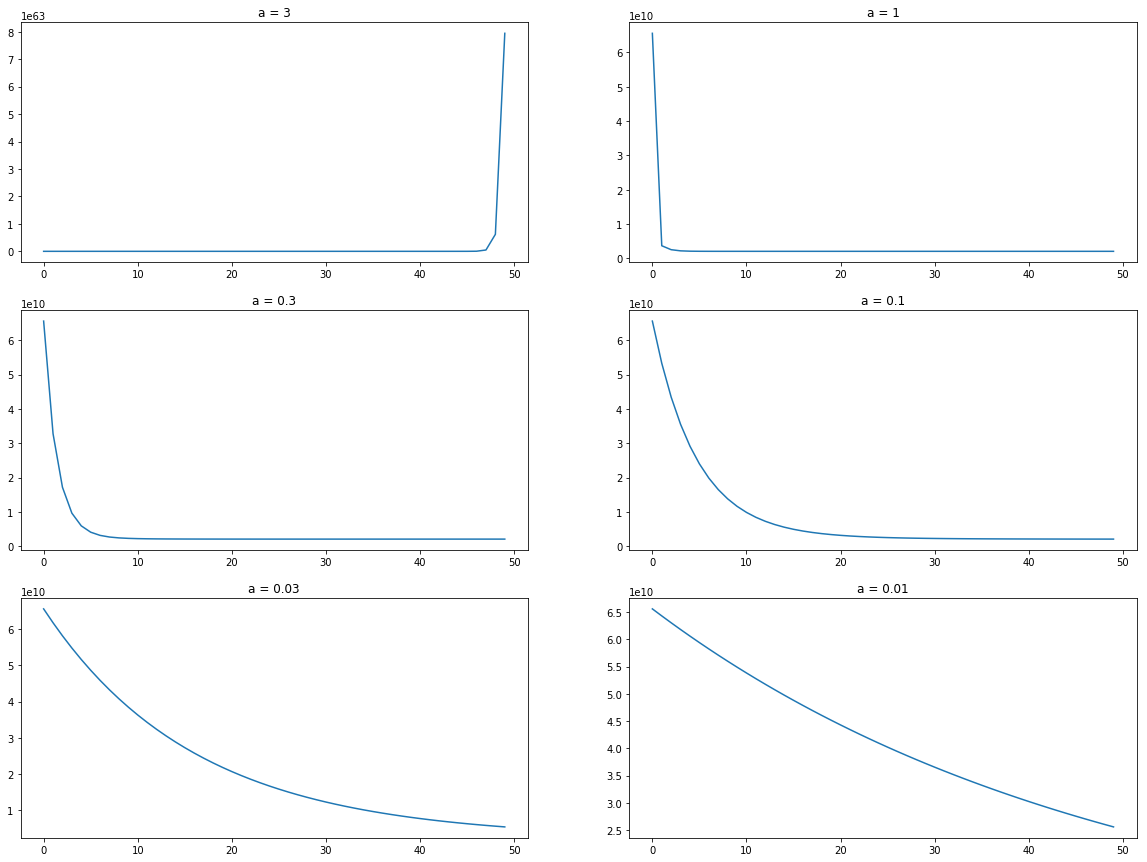

In [341]:
rate = [3, 1, 0.3, 0.1, 0.03, 0.01]
cost = []
xAxis = np.arange(50)
for i in range(len(rate)):
    t, c = gradDescMulti(x, y, np.zeros((3, 1)), rate[i], 50)
    cost.append(c)
plt.figure(figsize=(20,15))
for i in range(len(rate)):
    plt.subplot(3,2,i + 1)
    plt.plot(xAxis, cost[i])
    plt.title('a = ' + str(rate[i]))

In [342]:
t, c = gradDescMulti(x, y, np.zeros((3, 1)), 0.01, 400)
pred = t[0] + t[1] * (1650 - mean[0]) / std[0] + t[2] * (3 - mean[1]) / std[1]
pred[0]

289314.6203377763

In [343]:
# 3.3 Normal Eqaution 
from numpy.linalg import inv
theta_ne = np.dot(np.dot(inv(np.dot(x.T, x)), x.T), y)
pred_ne = theta_ne[0] + theta_ne[1] * (1650 - mean[0]) / std[0] + theta_ne[2] * (3 - mean[1]) / std[1]
pred_ne[0]

293081.4643348962